# Necessary Libraries to be Installed

In [ ]:
# ! pip install keras
# !pip install keras.utils
# ! pip install tensorflow
# ! pip install --upgrade keras
# ! pip install np_utils
# ! pip install sentence_transformers
# # ! pip install --upgrade tensorflow
# ! pip install keras==2.12.0
# ! pip install catboost

# Requirements

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
from keras.utils import to_categorical


# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


# Machine Learning Models
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

from sklearn.pipeline import Pipeline

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

#Train and Test Split
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Data Processing

In [2]:
import pandas as pd
Couplets = pd.read_csv("data/Sindhi_couplet.csv", encoding='utf-8',  names=['couplet','poet'])
Couplets.head()

,couplet,poet
0,Couplet,Poet
1,وَحۡدَہٗ جَي وَڍِيا، ڪِئا اِلّاَاللهَ اَڌَ،\nس...,Shah Abdul Latif Bhitai
2,وَحۡدَہٗ لا شَرِيکَ لَهٗ، اِيُّ ھيڪَڙائِيَ حَق...,Shah Abdul Latif Bhitai
3,پاڻِهۡ پَسي پاڻَ کي، پاڻِهۡ ئِي محبوبُ،\r\nپا...,Shah Abdul Latif Bhitai
4,سو ھِيُ، سو ھُو، سـو اَجلُ، سو اللهُ،\nسو پِري...,Shah Abdul Latif Bhitai


In [ ]:

print(Couplets['poet'].unique())
xLabels=['Shah Abdul Latif Bhitai', 'Ustad Bukhari', 'Sheikh Ayaz',
 'Masroor Pirzada', 'Adil Soomro']
X_train, X_test, y_train, y_test = train_test_split(Couplets['couplet'], Couplets['poet'], test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer(max_df=0.5, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model_acc = {}


['Poet' 'Shah Abdul Latif Bhitai' 'Ustad Bukhari' 'Sheikh Ayaz'
 'Masroor Pirzada' 'Adil Soomro']


# Plotting Graph

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize

def plot_confusion_matrix_multiclass(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix with {title}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()








# Predicting with the Model

In [ ]:
# Assuming you have a new couplet to predict
new_couplet = ["ھاءِ مان هن کي ڏيان ڪهڙي ميار؟ ڪنهن نڀايو ناهه ڪنهن سان، اي اديون"]

# Use the trained TF-IDF vectorizer to transform the new couplet
new_couplet_tfidf = tfidf_vectorizer.transform(new_couplet)

# Use the trained classifier to predict the poet for the new couplet
predicted_poet = classifier.predict(new_couplet_tfidf)

print(f"Predicted poet: {predicted_poet[0]}")


Predicted poet: Sheikh Ayaz


In [ ]:
# Assuming you have a new couplet to predict
new_couplet = ["جِت هي منهنجو پيار مُسافر ٿَڪُ ڀڃي، تنهنجي نيڻن جا سي پياري! ٿاڪ ڪٿي!"]


# Use the trained TF-IDF vectorizer to transform the new couplet
new_couplet_tfidf = tfidf_vectorizer.transform(new_couplet)

# Use the trained classifier to predict the poet for the new couplet
predicted_poet = classifier.predict(new_couplet_tfidf)

print(f"Predicted poet: {predicted_poet[0]}")


Predicted poet: Adil Soomro


# Machine Learning Models

## Naive Bayes Classifier

In [ ]:
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),
#     ('clf', MultinomialNB())
# ])

# # Define hyperparameters to search
# parameters = {
#     'tfidf__max_df': [0.5, 0.75, 1.0],
#     'tfidf__ngram_range': [(1, 1), (1, 2)],
#     'clf__alpha': [0.1, 0.5, 1.0]
# }

# # Use GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best model from the grid search
# best_classifier = grid_search.best_estimator_

# # Make predictions on the test set
# y_pred = best_classifier.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Best Hyperparameters: {grid_search.best_params_}")
# print(f"Accuracy: {accuracy}")

classifier_nb = MultinomialNB(alpha=0.1)
classifier_nb.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier_nb.predict(X_test_tfidf)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
model_acc['Naive Bayes'] =  accuracy


Accuracy: 0.8674463937621832


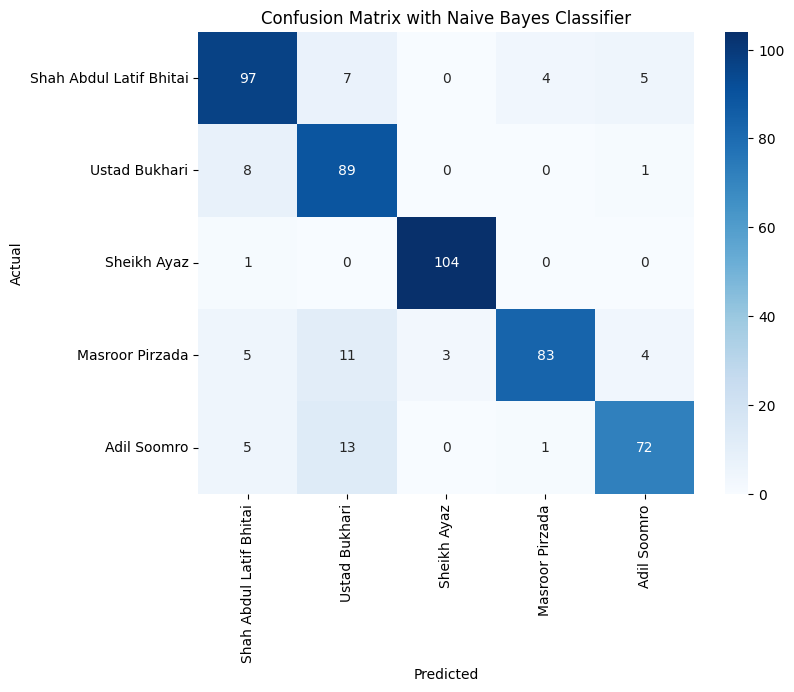

In [ ]:
plot_confusion_matrix_multiclass(y_test, y_pred, xLabels, title = "Naive Bayes Classifier")

## Support vector Gradient

In [ ]:
print(y_train.shape)

(2048,)


In [ ]:
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)

# Fit the model
sgd_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_sgd = sgd_classifier.predict(X_test_tfidf)

# Evaluate the accuracy
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"SGD Classifier Accuracy: {accuracy_sgd}")
model_acc['Stocastic Gradient Descent'] = accuracy_sgd

SGD Classifier Accuracy: 0.8810916179337231


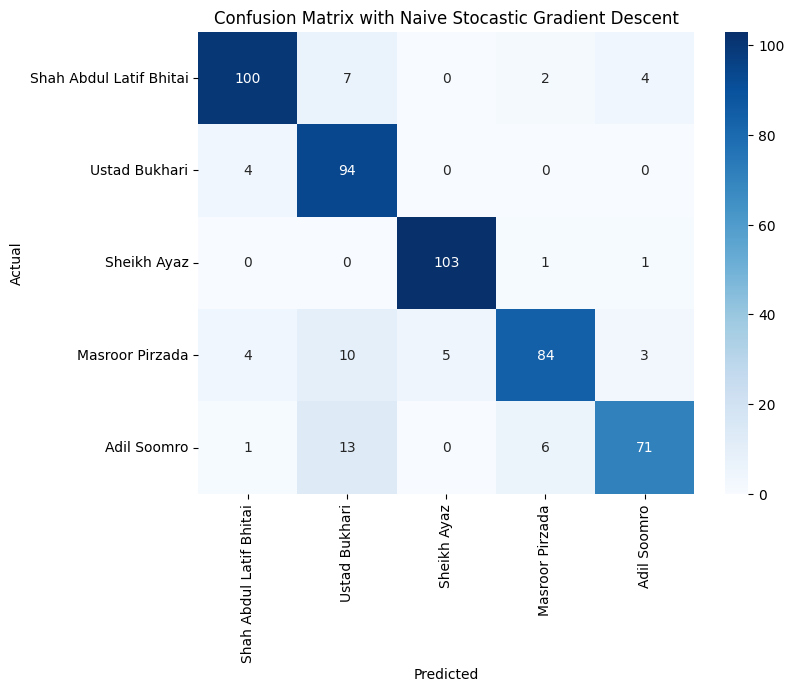

In [ ]:
plot_confusion_matrix_multiclass(y_test, y_pred_sgd, xLabels, title = "Naive Stocastic Gradient Descent")

## Random Forest

In [ ]:
# Use Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 50, min_samples_split = 5 )
random_forest_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_classifier.predict(X_test_tfidf)

# Evaluate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
model_acc['Random Forest'] = accuracy_rf

Random Forest Accuracy: 0.7115009746588694


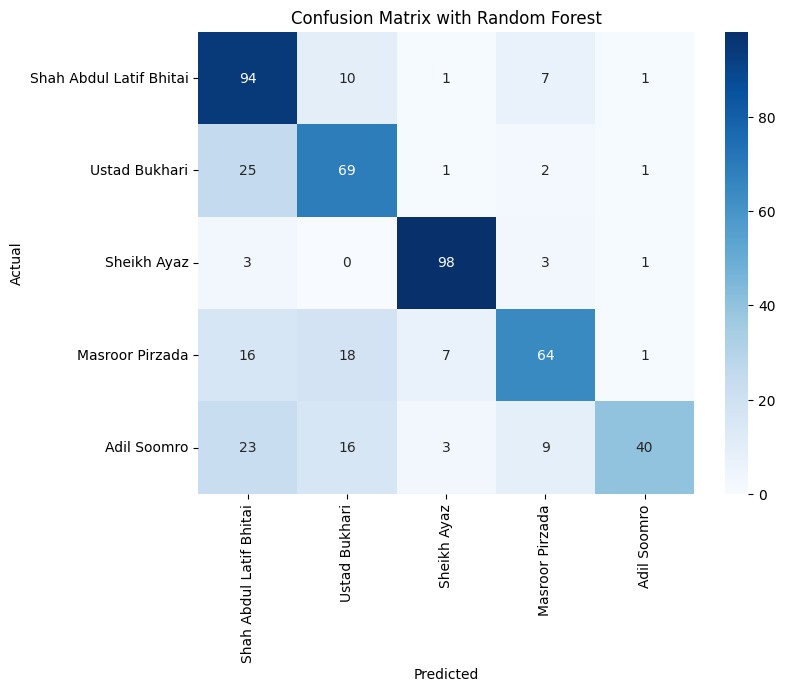

In [ ]:
plot_confusion_matrix_multiclass(y_test, y_pred_rf, xLabels, title = "Random Forest")

## XGBoost

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Use XGBoost for classification
xg_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=42)

# Fit the model
xg_classifier.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_pred_xg = xg_classifier.predict(X_test_tfidf)

# Inverse transform to get the original string labels
decoded_pred_labels = label_encoder.inverse_transform(y_pred_xg)

# Evaluate the accuracy
accuracy_xg = accuracy_score(y_test, decoded_pred_labels)
print(f"XGBoost Classifier Accuracy: {accuracy_xg}")
model_acc['XGBoost'] = accuracy_xg

XGBoost Classifier Accuracy: 0.6803118908382066


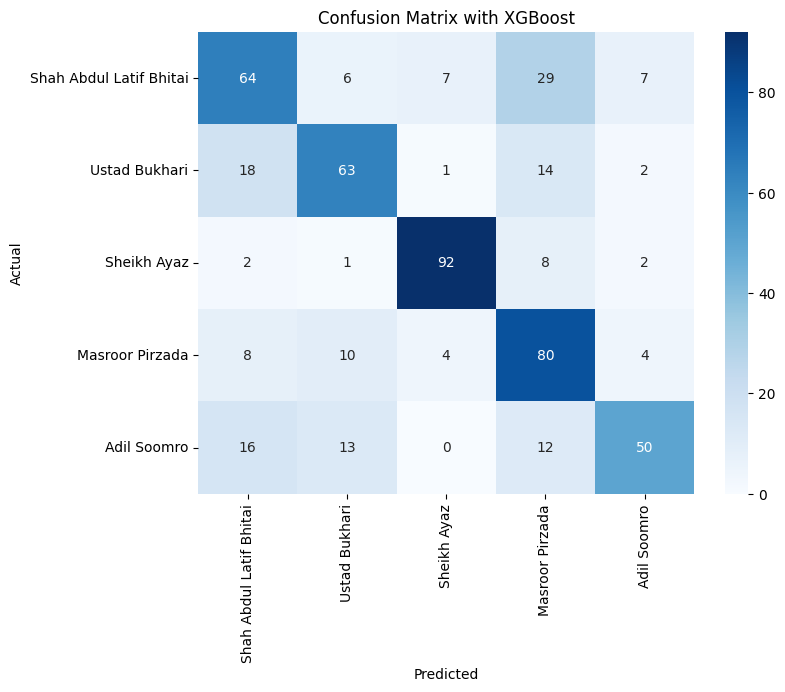

In [ ]:
plot_confusion_matrix_multiclass(y_test, decoded_pred_labels, xLabels, title = "XGBoost")

## CatBoost

In [ ]:
catboost_classifier = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.1, loss_function='MultiClass', random_state=42)

# Fit the model
catboost_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_catboost = catboost_classifier.predict(X_test_tfidf)

# Evaluate the accuracy
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Classifier Accuracy: {accuracy_catboost}")
model_acc['CatBoost'] = accuracy_catboost

0:	learn: 1.7426683	total: 194ms	remaining: 19.2s
1:	learn: 1.6982345	total: 342ms	remaining: 16.8s
2:	learn: 1.6591161	total: 486ms	remaining: 15.7s
3:	learn: 1.6238094	total: 630ms	remaining: 15.1s
4:	learn: 1.5962795	total: 782ms	remaining: 14.9s
5:	learn: 1.5754034	total: 942ms	remaining: 14.8s
6:	learn: 1.5556092	total: 1.15s	remaining: 15.2s
7:	learn: 1.5307551	total: 1.49s	remaining: 17.1s
8:	learn: 1.5119140	total: 1.84s	remaining: 18.6s
9:	learn: 1.4956292	total: 2.05s	remaining: 18.5s
10:	learn: 1.4803345	total: 2.23s	remaining: 18s
11:	learn: 1.4668694	total: 2.39s	remaining: 17.5s
12:	learn: 1.4508641	total: 2.54s	remaining: 17s
13:	learn: 1.4358129	total: 2.69s	remaining: 16.5s
14:	learn: 1.4216607	total: 2.84s	remaining: 16.1s
15:	learn: 1.4060244	total: 3s	remaining: 15.7s
16:	learn: 1.3949450	total: 3.16s	remaining: 15.4s
17:	learn: 1.3838468	total: 3.31s	remaining: 15.1s
18:	learn: 1.3741425	total: 3.46s	remaining: 14.8s
19:	learn: 1.3658559	total: 3.7s	remaining: 14.8

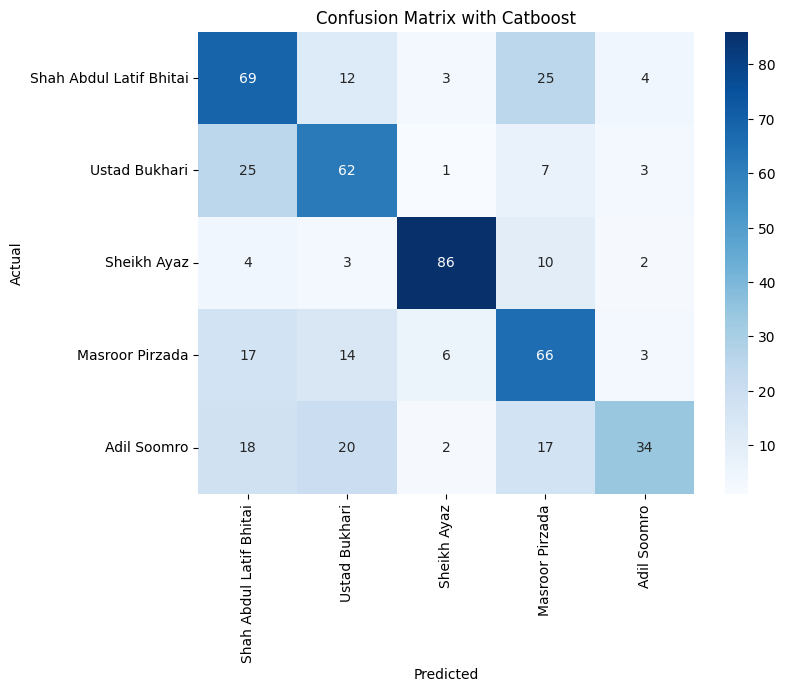

In [ ]:
plot_confusion_matrix_multiclass(y_test, y_pred_catboost, xLabels, title = "Catboost")

## LightGBM

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Use LightGBM for classification
lgb_classifier = lgb.LGBMClassifier(objective='multiclass', num_class=5, random_state=42)

# Fit the model
lgb_classifier.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_pred_lgb = lgb_classifier.predict(X_test_tfidf)

# Inverse transform to get the original string labels
decoded_pred_labels = label_encoder.inverse_transform(y_pred_lgb)

# Evaluate the accuracy
accuracy_lgb = accuracy_score(y_test, decoded_pred_labels)
print(f"LightGBM Classifier Accuracy: {accuracy_lgb}")
model_acc['LightGBM'] = accuracy_lgb

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3473
[LightGBM] [Info] Number of data points in the train set: 2048, number of used features: 158
[LightGBM] [Info] Start training from score -1.493392
[LightGBM] [Info] Start training from score -1.628167
[LightGBM] [Info] Start training from score -7.624619
[LightGBM] [Info] Start training from score -1.645733
[LightGBM] [Info] Start training from score -1.648268
[LightGBM] [Info] Start training from score -1.643205
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

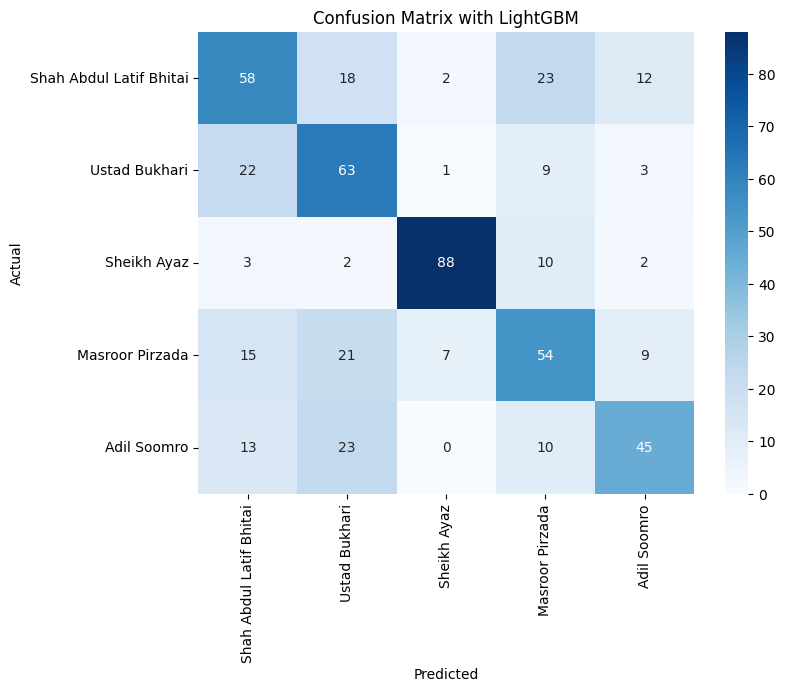

In [ ]:
plot_confusion_matrix_multiclass(y_test, decoded_pred_labels, xLabels, title = "LightGBM")

## Logistic Regression

In [ ]:
# Use Logistic Regression for classification
logistic_regression_classifier = LogisticRegression(random_state=42)

# Fit the model
logistic_regression_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_logistic_regression = logistic_regression_classifier.predict(X_test_tfidf)

# Evaluate the accuracy
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print(f"Logistic Regression Classifier Accuracy: {accuracy_logistic_regression}")
model_acc['Logistic Regression'] = accuracy_logistic_regression

Logistic Regression Classifier Accuracy: 0.8460038986354775


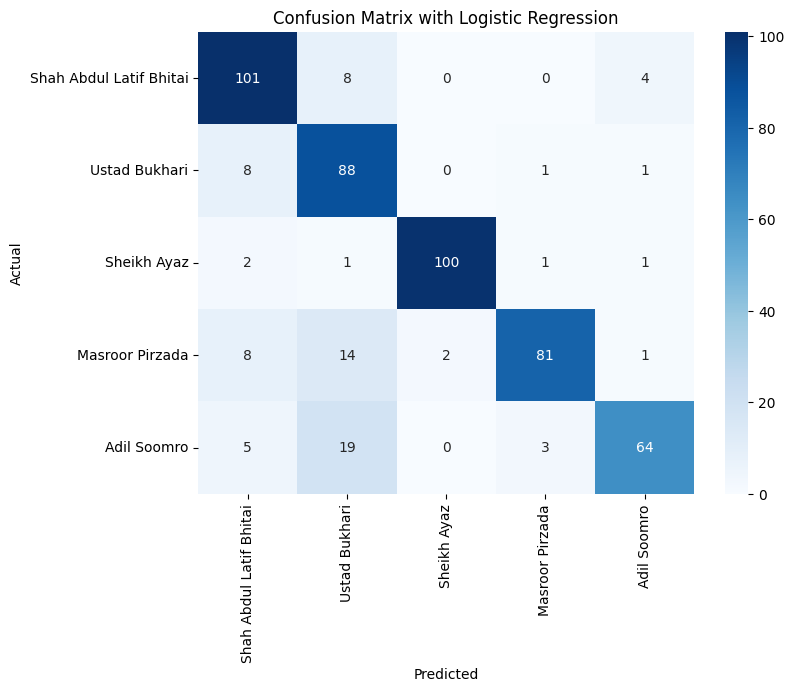

In [ ]:
plot_confusion_matrix_multiclass(y_test, y_pred_logistic_regression, xLabels, title = "Logistic Regression")

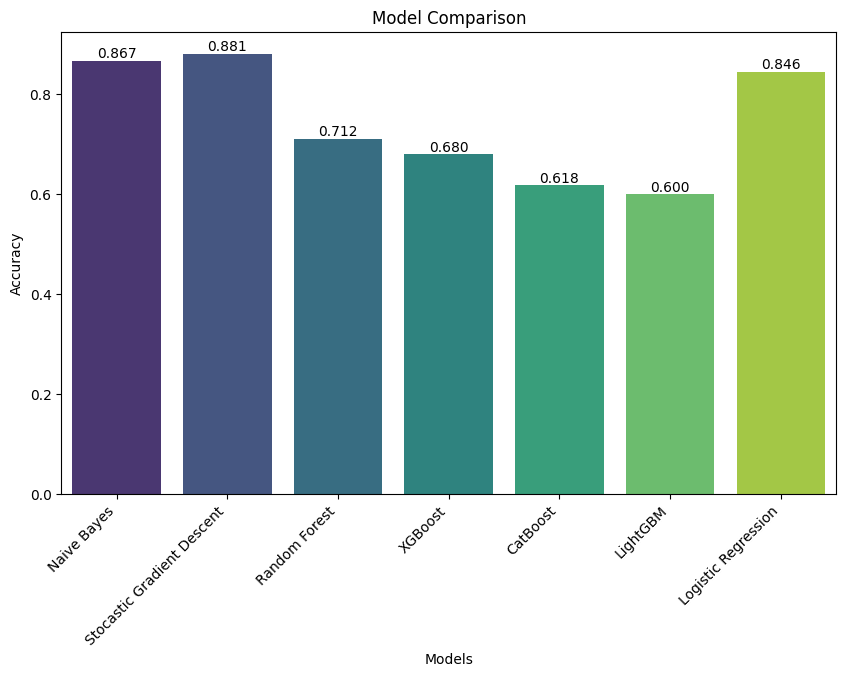

In [ ]:
model_names = list(model_acc.keys())
accuracies = list(model_acc.values())

# Creating a Seaborn bar plot with annotations
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=model_names, y=accuracies, palette='viridis')

# Annotating each bar with its accuracy value
for idx, value in enumerate(accuracies):
    bar_plot.text(idx, value, f'{value:.3f}', ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()